# Graph Analysis - II

## Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
%matplotlib inline

## Centrality measures for the nodes 

In [8]:
Gk=nx.karate_club_graph()

https://networkx.github.io/documentation/latest/reference/algorithms.centrality.html
    
https://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

We start by computing the different centrality measures for our graph.

In [30]:
pagerank_c = nx.pagerank(Gk)
eigenvector_c = nx.eigenvector_centrality(Gk)
betweenness_c = nx.betweenness_centrality(Gk)
closeness_c = nx.closeness_centrality(Gk)
degree_c = nx.degree_centrality(Gk)
#print pagerank_c

In [32]:
n = len(Gk.nodes())
deg = np.zeros(n)
pr = np.zeros(n)
eig = np.zeros(n)
bw = np.zeros(n)
i=0
for node in Gk:
    deg[i] = degree_c[node]
    pr[i] = pagerank_c[node]
    eig[i] = eigenvector_c[node]
    bw[i] = betweenness_c[node]
    cl[i] = closeness_c[node]
    i+=1
    
measures = pd.DataFrame()
measures['nodes'] = Gk.nodes()
measures.set_index(['nodes'], inplace=True)
measures['eigenvector_c'] = pd.DataFrame.from_dict(eigenvector_c, orient='index')
measures['pagerank_c'] = pd.DataFrame.from_dict(pagerank_c, orient='index')
measures['closeness_c'] = pd.DataFrame.from_dict(closeness_c, orient='index')
measures['degree_c'] = pd.DataFrame.from_dict(degree_c, orient='index')
measures['betweenness_c'] = pd.DataFrame.from_dict(betweenness_c, orient='index')

We can also do a scatterplot for all the different pairs of centralities measures and try to see if there are any strong trends.

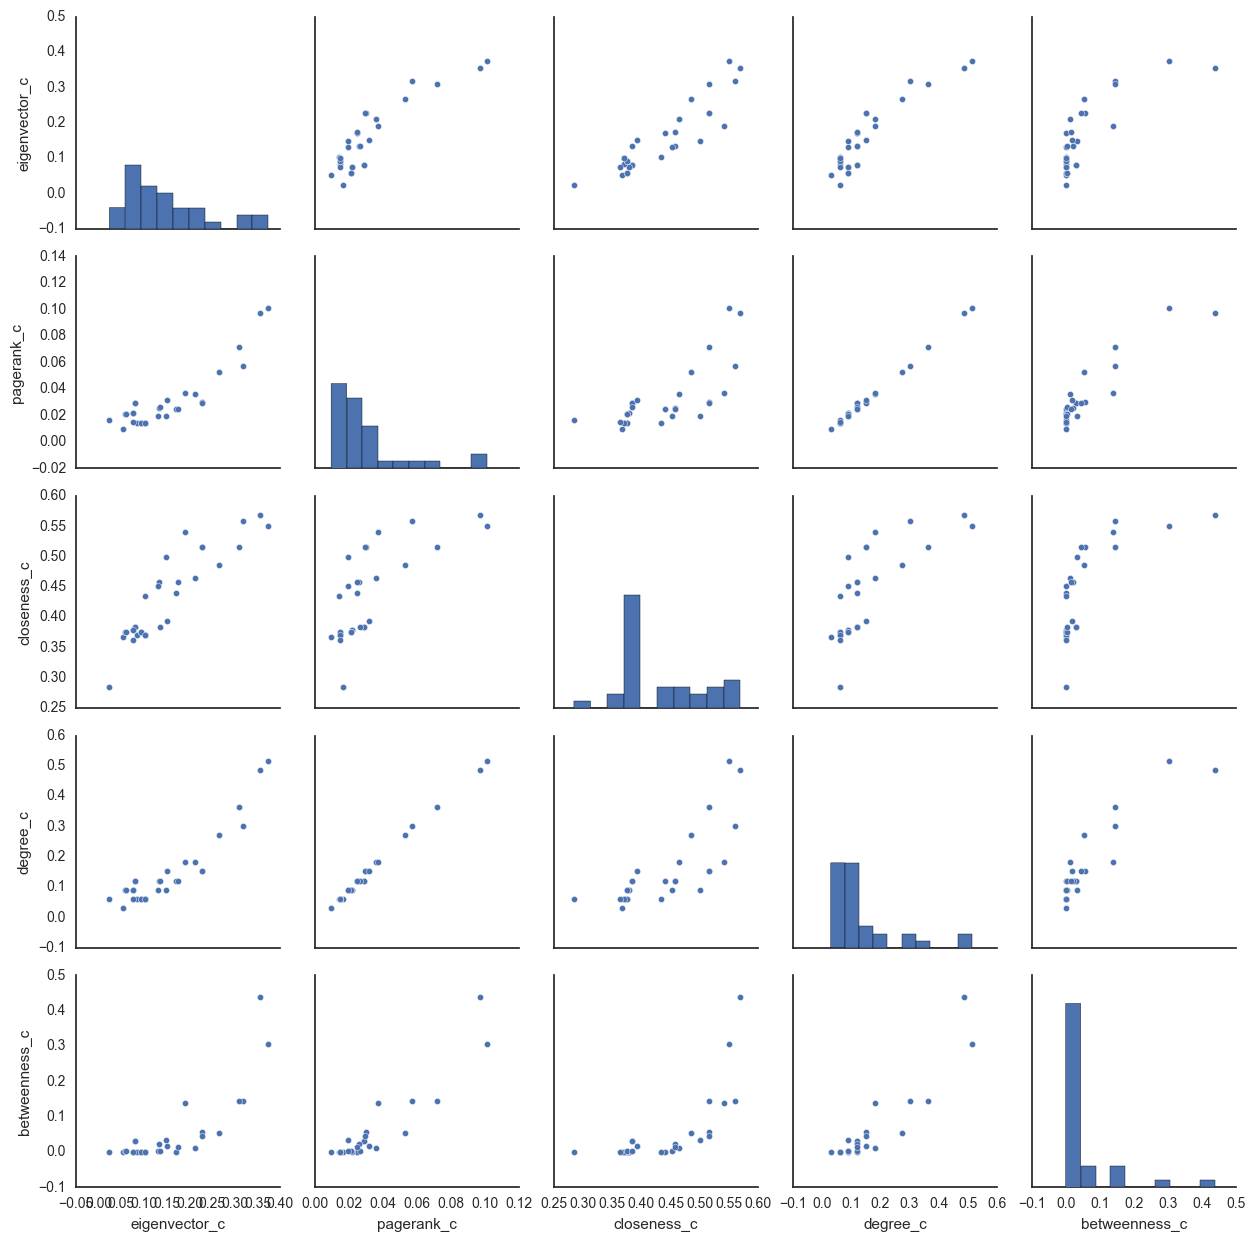

In [33]:
with sns.axes_style('white'):
    sns.pairplot(measures)    

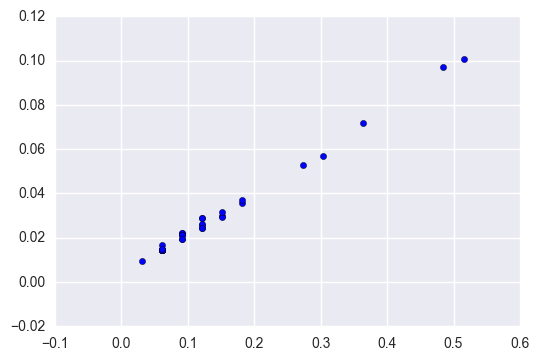

In [12]:
plt.scatter(deg,pr)
plt.show()

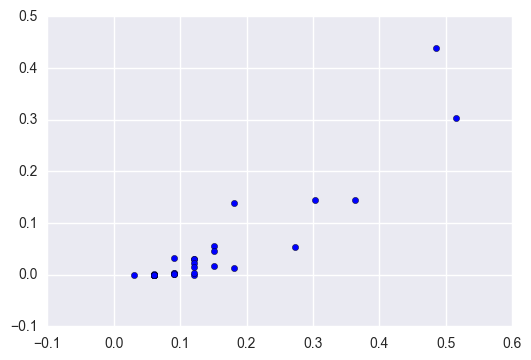

In [13]:
plt.scatter(deg,bw)
plt.show()

When plotting the graph, we can choose to represent the centrality of each node as its size. 

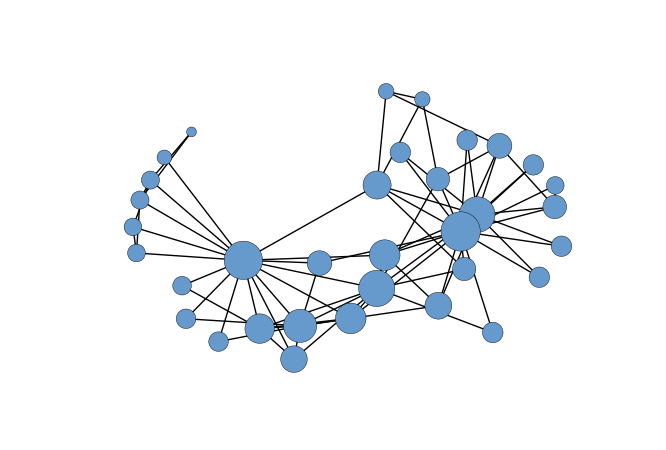

In [34]:
# plotting the graph 
scaler = MinMaxScaler((50,800))
eig_scaled = scaler.fit_transform(eig[:,np.newaxis])
node_size = eig_scaled
nx.draw(Gk, node_size=node_size, node_color='#6699cc')

Let's see how the above apply to directed graphs.

In [15]:
print(len(Gk.nodes()), len(Gk.edges()))

34 78


In [18]:
G = nx.read_gml('data/celegansneural.gml')

In [19]:
nx.is_strongly_connected(G)

False

If the graph is **not** strongly connected, we can keep its largest strongly connected component.

In [20]:
scc = nx.strongly_connected_component_subgraphs(G)
sizemax = 0
Gmax = G
for g in scc:
    if len(g.nodes())>sizemax:
        Gmax = g
        sizemax = len(Gmax.nodes())
len(Gmax.nodes())

239

In [21]:
Gmax = nx.DiGraph(Gmax)
degree_c = nx.degree_centrality(Gmax)
pagerank_c = nx.pagerank(Gmax)
eigenvector_c = nx.eigenvector_centrality(Gmax)
betweenness_c = nx.betweenness_centrality(Gmax)

In [22]:
n = len(Gmax.nodes())
deg = np.zeros(n)
pr = np.zeros(n)
eig = np.zeros(n)
bw = np.zeros(n)
i=0
for node in Gmax:
    deg[i] = degree_c[node]
    pr[i] = pagerank_c[node]
    eig[i] = eigenvector_c[node]
    bw[i] = betweenness_c[node]
    i+=1
measures = pd.DataFrame()
measures['nodes'] = Gmax.nodes()
measures.set_index(['nodes'], inplace=True)
measures['eigenvector_c'] = pd.DataFrame.from_dict(eigenvector_c, orient='index')
measures['pagerank_c'] = pd.DataFrame.from_dict(pagerank_c, orient='index')
measures['degree_c'] = pd.DataFrame.from_dict(degree_c, orient='index')
measures['betweenness_c'] = pd.DataFrame.from_dict(betweenness_c, orient='index')

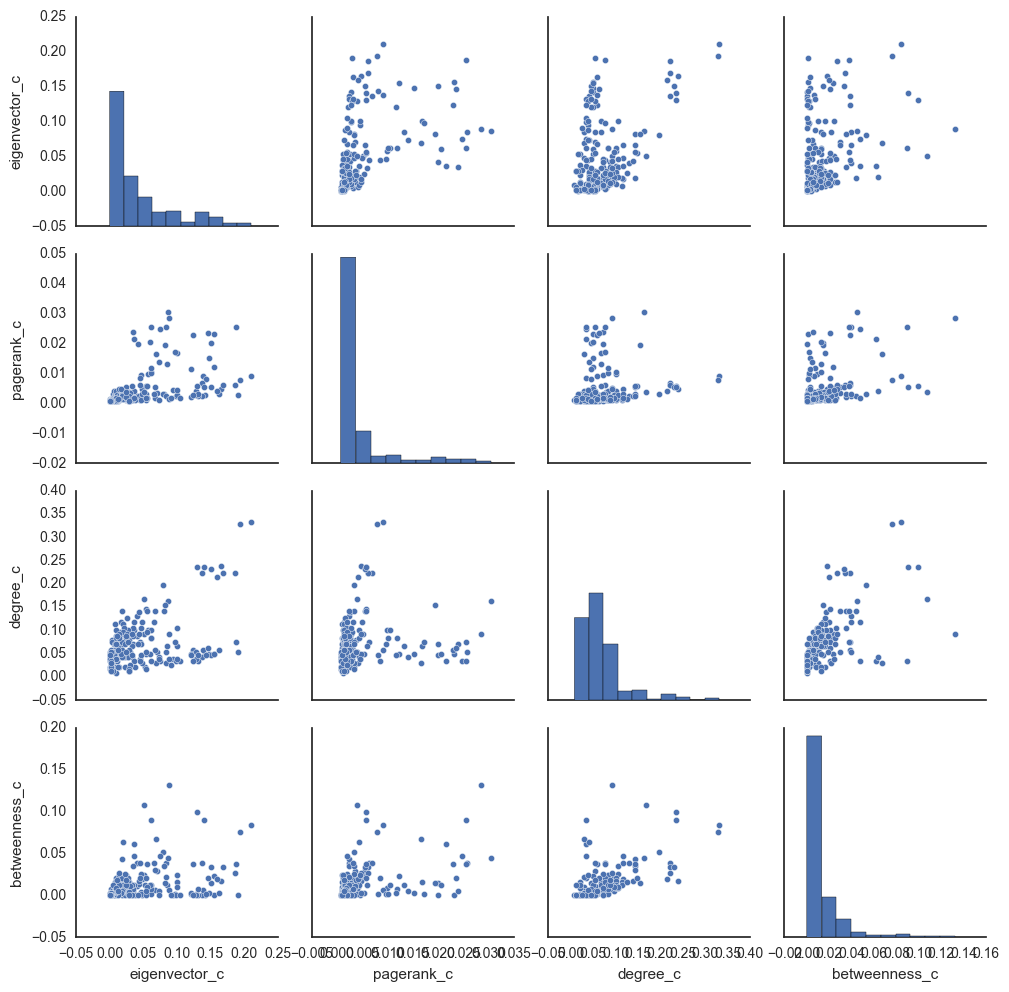

In [24]:
with sns.axes_style('white'):
    sns.pairplot(measures)    